###### Projeto de Classificação de empréstimo

<img src="Imagens/emprestimo.jpg" alt="drawing" width="50%"/>

Esse projeto tem o objetivo de classificar se um determinado cliente será aprovado ou não para um empréstimo.

Esse problema vem da empresa empréstimo fácil S.A. O CEO da empresa quer saber a melhor forma de poder aprovar empréstimo baseado naS informações da pessoa. Atualmente eles usam o método de entrevista, porém tal método demora muito, sendo necessário a criação de um método mais rápido.

# Imports

In [282]:
# bibliotecas que serão usadas ao longo do notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from IPython.core.display import HTML

## Funções de Auxílio

In [146]:
# função dos parâmetros do gráfico
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    warnings.filterwarnings('ignore')

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Carregando os dados

In [3]:
dados_raw = pd.read_csv('Dados/treino.csv')
dados_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Descrição dos dados

Veremos uma breve descrição dos dados, de forma a entender melhor os dados para as etapas posteriores.

In [4]:
dados1 = dados_raw.copy()

## Renomeando as colunas

In [5]:
dados1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# renomeando as colunas
dados1.columns = ['id_emprestimo', 'genero', 'casado', 'dependentes', 'educacao',
                  'autonomo', 'renda_requerente', 'renda_co-requerente', 'valor_emprestimo',
                  'prazo_emprestimo', 'historico_credito', 'tipo_propriedade',
                  'status_emprestimo']

dados1.head()

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_co-requerente,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Para facilitar o entendimento, vamos deixar tudo em português, então passaremos os valores das colunas em inglês para português.

In [7]:
dados1['genero'] = dados1['genero'].replace(['Male', 'Female'], ['Masculino', 'Feminino'])
dados1['educacao'] = dados1['educacao'].replace(['Graduate', 'Not Graduate'],
                                                ['Graduado', 'Não Graduado'])
# rural é escrito da mesma forma
dados1['tipo_propriedade'] = dados1['tipo_propriedade'].replace(['Urban', 'Semiurban'],
                                                                ['Urbano', 'Semi-urbano'])
dados1['casado'] = dados1['casado'].replace(['Yes', 'No'], ['Sim', 'Não'])
dados1['autonomo'] = dados1['autonomo'].replace(['Yes', 'No'], ['Sim', 'Não'])
dados1['status_emprestimo'] = dados1['status_emprestimo'].replace(['Y', 'N'], ['Aprovado', 'Negado'])
dados1['historico_credito'] = dados1['historico_credito'].replace([1.0, 0.0],
                                                                        ['Bom', 'Ruim'])

In [8]:
dados1.head(1)

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_co-requerente,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,Masculino,Não,0,Graduado,Não,5849,0.0,NaN,360.0,Bom,Urbano,Aprovado


### Dicionário dos dados
* **id_emprestimo**: Índice do emprestimo
* **genero**: Genêro do requerente
* **casado**: Se o requerente é casado
* **dependentes**: Quantos dependentes possui o requerente
* **educacao**: Se o requerente possui ensino superior ou não
* **autonomo**: Se o requerente é trabalhador autônomo
* **renda_requerente**: Qual a renda do requerente
* **renda_co-requerente**: Qual a renda do co-requenrete (seja conjuge, sócio, etc...)
* **valor_emprestimo**: Valor do empréstimo
* **prazo_emprestimo**: Quantidade de meses para pagar o empréstimo
* **historico_credito**: Histórico do requerente em créditos.
* **tipo_propriedade**: Tipo de propriedade do requerente
* **status_emprestimo**: Status do empréstimo, dizendo se ele foi aprovado ou negado

In [9]:
dados1['historico_credito'].unique()

array(['Bom', 'Ruim', nan], dtype=object)

## Dimensões dos dados

In [10]:
print(f'Número de linhas: {dados1.shape[0]}')
print(f'Número de colunas: {dados1.shape[1]}')

Número de linhas: 614
Número de colunas: 13


## Tipos de dados

In [11]:
dados1.dtypes

id_emprestimo           object
genero                  object
casado                  object
dependentes             object
educacao                object
autonomo                object
renda_requerente         int64
renda_co-requerente    float64
valor_emprestimo       float64
prazo_emprestimo       float64
historico_credito       object
tipo_propriedade        object
status_emprestimo       object
dtype: object

## Checando valores ausentes

In [12]:
dados1.isna().sum()

id_emprestimo           0
genero                 13
casado                  3
dependentes            15
educacao                0
autonomo               32
renda_requerente        0
renda_co-requerente     0
valor_emprestimo       22
prazo_emprestimo       14
historico_credito      50
tipo_propriedade        0
status_emprestimo       0
dtype: int64

Temos os seguintes valores ausentes:
* **genero**: Possivelmente a pessoa não preencheu esse dados ou não foi cadastrado. Nesse caso descartaremos as linhas que possuem valores ausentes
* **casado**: Mesmo motivo citado acima. Também descartaremos as linhas
* **dependentes**: Consideraremos o valor que se repete mais vezes para o preenchimento
* **autonomo**: Consideraremos que os valores ausentes são de requerentes que não trabalham como autônomos.
* **valor_emprestimo**: Colocaremos a média dos valores de empréstimo
* **prazo_emprestimo**: Colocaremos o valor mais comum, no caso o valor que mais se repete que é a moda, para os valores ausentes
* **historico_credito**: O mesmo de  `prazo_emprestimo`

### Preenchendo os valores

In [13]:
# dependentes
dados1.groupby('dependentes')['id_emprestimo'].nunique()

dependentes
0     345
1     102
2     101
3+     51
Name: id_emprestimo, dtype: int64

In [14]:
# empréstimo
dados1['valor_emprestimo'].mean()

146.41216216216216

In [15]:
# prazo empréstimo
dados1.groupby('prazo_emprestimo')['id_emprestimo'].nunique()

prazo_emprestimo
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: id_emprestimo, dtype: int64

In [16]:
# histórico crédito
dados1.groupby('historico_credito')['id_emprestimo'].nunique()

historico_credito
Bom     475
Ruim     89
Name: id_emprestimo, dtype: int64

In [17]:
dados1['dependentes'].fillna('0', inplace=True)
dados1['valor_emprestimo'].fillna(146.41, inplace=True)
dados1['prazo_emprestimo'].fillna(360., inplace=True)
dados1['historico_credito'].fillna('Bom', inplace=True)
dados1['autonomo'].fillna('Não', inplace=True)

In [18]:
dados1.isna().sum()

id_emprestimo           0
genero                 13
casado                  3
dependentes             0
educacao                0
autonomo                0
renda_requerente        0
renda_co-requerente     0
valor_emprestimo        0
prazo_emprestimo        0
historico_credito       0
tipo_propriedade        0
status_emprestimo       0
dtype: int64

### Excluindo os valores

In [19]:
# verificando novamente o valor de linhas
print(f'Número de linhas: {dados1.shape[0]}')

Número de linhas: 614


In [20]:
dados1 = dados1.dropna()

In [21]:
# verificando novamente o valor de linhas
print(f'Número de linhas: {dados1.shape[0]}')

Número de linhas: 598


Vemos que só exclui as 16 linhas não tratadas, o que deixou nossos dados tratados. Vamos conferir se todos os valores ausentes foram tratados.

In [22]:
dados1.isna().sum()

id_emprestimo          0
genero                 0
casado                 0
dependentes            0
educacao               0
autonomo               0
renda_requerente       0
renda_co-requerente    0
valor_emprestimo       0
prazo_emprestimo       0
historico_credito      0
tipo_propriedade       0
status_emprestimo      0
dtype: int64

Com os valores tratados, podemos partir para a parte de estatística descritiva

## Estatística descritiva

In [23]:
atributos_numericos = dados1.select_dtypes(include=['float64', 'int64'])
atributos_categoricos = dados1.select_dtypes(exclude=['float64', 'int64'])

### Atributos numéricos

In [24]:
# métricas de tendência central
media = pd.DataFrame(atributos_numericos.apply(np.mean)).T 
mediana = pd.DataFrame(atributos_numericos.apply(np.median)).T 

# métricas de dispersão
std = pd.DataFrame(atributos_numericos.apply(np.std)).T # desvio-padrão
minimo = pd.DataFrame(atributos_numericos.apply(min)).T # valor mínimo
maximo = pd.DataFrame(atributos_numericos.apply(max)).T # valor máximo
range_ = pd.DataFrame(atributos_numericos.apply(lambda x: x.max() - x.min())).T # range
assimetria = pd.DataFrame(atributos_numericos.apply(lambda x: x.skew())).T # assimetria
curtose = pd.DataFrame(atributos_numericos.apply(lambda x: x.kurtosis())).T # curtose

# concatenar as métricas
metricas = pd.concat([minimo, maximo, range_, media, mediana, std, assimetria,
                      curtose]).T.reset_index()

# nomear as colunas dos atributos concatenados
metricas.columns = ['Atributos', 'Mínimo', 'Máximo', 'Range', 'Média', 'Mediana', 'Desvio-Padrão',
                    'Assimetria', 'Curtose']
metricas

,Atributos,Mínimo,Máximo,Range,Média,Mediana,Desvio-Padrão,Assimetria,Curtose
0,renda_requerente,150.0,81000.0,80850.0,5292.252508,3806.0,5802.407759,6.954134,70.388704
1,renda_co-requerente,0.0,41667.0,41667.0,1631.499866,1211.5,2950.845424,7.470981,83.959628
2,valor_emprestimo,9.0,650.0,641.0,145.019415,128.0,81.169045,2.575586,9.759223
3,prazo_emprestimo,12.0,480.0,468.0,342.341137,360.0,64.441029,-2.438550,7.026899


Essa tabela nos traz alguns bons parâmetros para entendermos nossos dados. O que iremos destacar aqui são os 3 últimos: desvio-padrão, assimetria e curtose. 

O desvio-padrão é uma medida de dispersão capaz de identificar o erro em torno da média, logo ele nos dá o grau de dispersão do nosso conjunto de dados. Podemos ver que o desvio padrão possui valores maiores que a media nas rendas, nos dandos que a renda deve ter valores muito dispersos da média. Já no valores e prazo do empréstimo, os valores devem ser próximos da média.

A Assimetria diz a deformação da distribuição em relação a uma distribuição normal. Assimetria positiva nos dizem que os dados estão com uma deformação para esquerda, logo isso nos diz que os dados estão mais concetrados em valores baixo. Assimetria negativa nos diz que a deformação dos dados é para a direita, estando os dados com valores maiores. as rendas e o valor do emprestimo estão com assimetria positiva, o que nós diz que a maior quantidade de valores estão em valores baixos, logo as rendas e os empréstimos são de valor baixo. O prazo de empréstimo está com assimetria negativo, o que nós diz que as pessoas pegam empréstimo com um prazo grande para o pagamento do mesmo.

A curtose nós diz qual concentrado estão nossos dados. Quanto maior a curtose, mais concentrado estão os dados em um determinado ponto, dando picos altos. Todos nosso valores são positivos, porém as rendas são as de valor mais alto, demonstrando que os dados estão agrupados em torno de um determinado valor.

Vamos ver a assimetria e a curtose em gráficos.

<AxesSubplot:xlabel='prazo_emprestimo', ylabel='Density'>

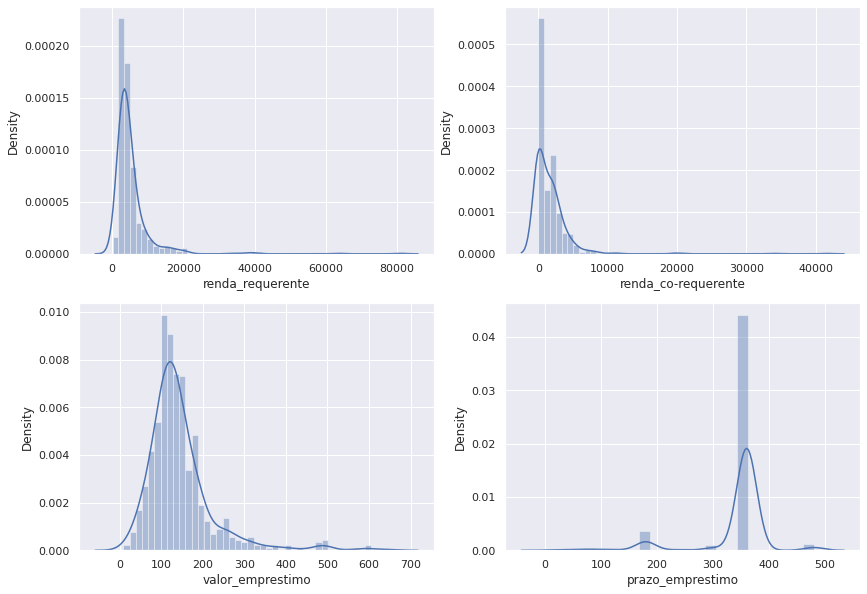

In [25]:
fig = plt.figure(figsize=(14, 10))

# renda_requerente
ax1 = fig.add_subplot(2, 2, 1)
sns.distplot(dados1['renda_requerente'], ax=ax1)

# renda_co-requerente
ax2 = fig.add_subplot(2, 2, 2)
sns.distplot(dados1['renda_co-requerente'], ax=ax2)

# valor_emprestimio
ax3 = fig.add_subplot(2, 2, 3)
sns.distplot(dados1['valor_emprestimo'], ax=ax3)

# prazo_emprestimo
ax4 = fig.add_subplot(2, 2, 4)
sns.distplot(dados1['prazo_emprestimo'], ax=ax4)

### Atributos categóricos

In [26]:
# ver quantas categorias temos por variáveis
atributos_categoricos.apply(lambda x: x.unique().shape[0])

id_emprestimo        598
genero                 2
casado                 2
dependentes            4
educacao               2
autonomo               2
historico_credito      2
tipo_propriedade       3
status_emprestimo      2
dtype: int64

<AxesSubplot:xlabel='educacao', ylabel='valor_emprestimo'>

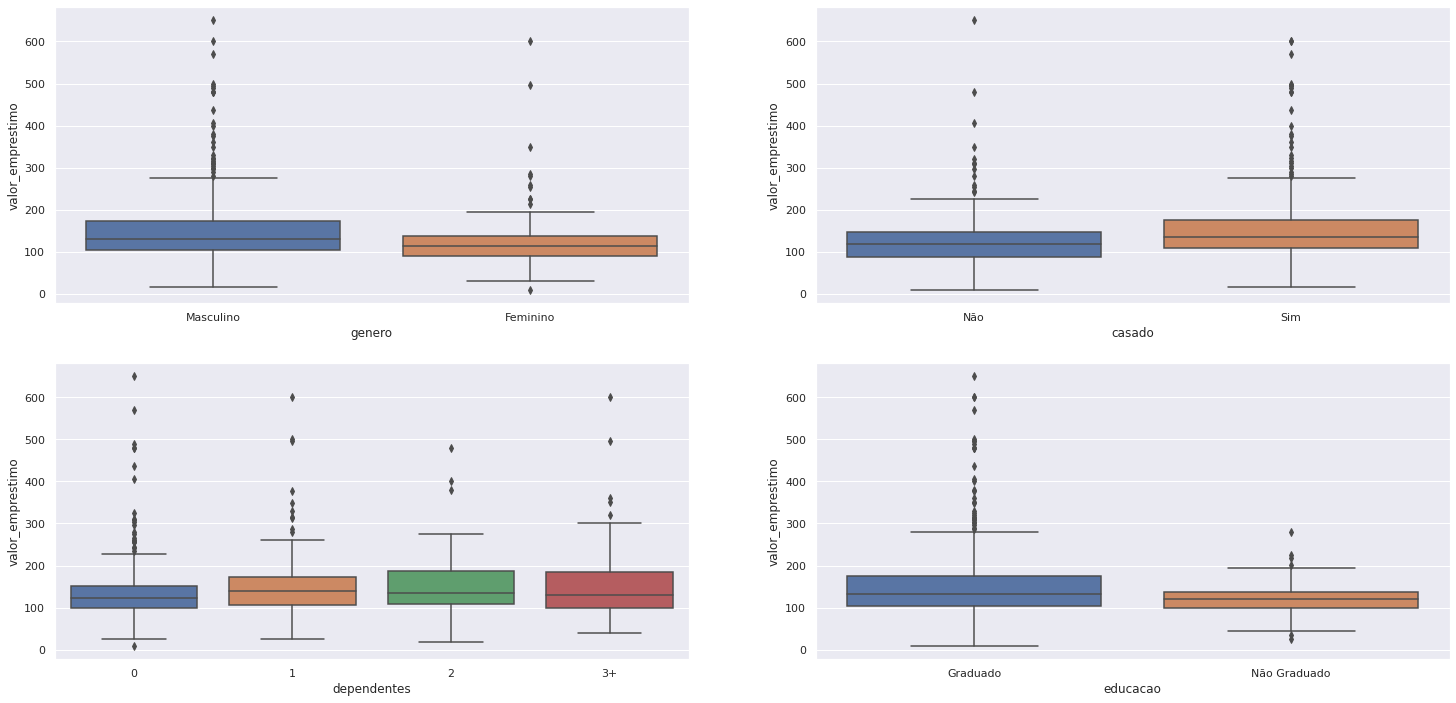

In [27]:
# genero
plt.subplot(2, 2, 1)
sns.boxplot(x='genero', y='valor_emprestimo', data=dados1)

# casado
plt.subplot(2, 2, 2)
sns.boxplot(x='casado', y='valor_emprestimo', data=dados1)

# dependentes
plt.subplot(2, 2, 3)
sns.boxplot(x='dependentes', y='valor_emprestimo', data=dados1)

# educacao
plt.subplot(2, 2, 4)
sns.boxplot(x='educacao', y='valor_emprestimo', data=dados1)

Considerando os valores dos emprestimos, podemos concluir que:
* Homens pedem emprestimo de valor maior
* Solteiros pedem emprestimo de valor maior
* Graduados pedem emprestimo de valor maior
* Pessoas com mais dependentes pedem emprestimo de valor maior

<AxesSubplot:xlabel='status_emprestimo', ylabel='valor_emprestimo'>

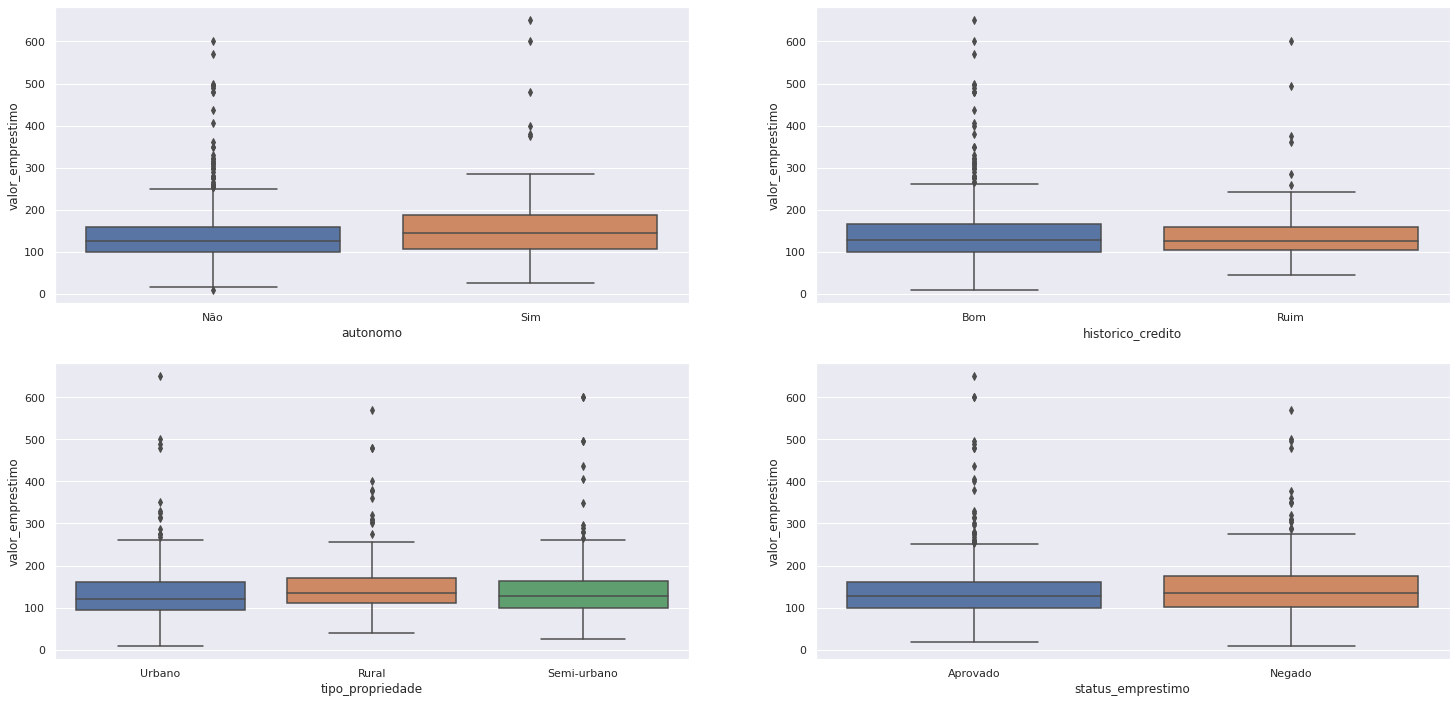

In [28]:
# autonomo
plt.subplot(2, 2, 1)
sns.boxplot(x='autonomo', y='valor_emprestimo', data=dados1)

# historico_credito
plt.subplot(2, 2, 2)
sns.boxplot(x='historico_credito', y='valor_emprestimo', data=dados1)

# tipo_propriedade
plt.subplot(2, 2, 3)
sns.boxplot(x='tipo_propriedade', y='valor_emprestimo', data=dados1)

# historico_credito
plt.subplot(2, 2, 4)
sns.boxplot(x='status_emprestimo', y='valor_emprestimo', data=dados1)

Continuando a análise:
* Autônomos pedem emprestimo de valor maior
* Pessoas com histórico bom de crédito pedem emprestimo de valor maior
* Não há uma diferença grande entre proprietários de propriedade rural, urbana e semi-urbana quando pedem empréstimo
* Empréstimo de valores menores são mais aprovados

# Criação de hipóteses

In [30]:
dados2 = dados1.copy()

Baseado no que já sabemos dos dados, criaremos as hipóteses que vem do conhecimento que temos sobre aprovação de empréstimos e o que vimos dos dados. Criaremos cinco hipóteses

1. Graduados tem maior chance de ter o empréstimo aprovado
2. Autônomos tem maior chance de ter o empréstimo negado
3. Pessoas com rendas maiores tem mais chance de ter o empréstimo aprovado
4. Valores de empréstimo baixo tem maior chance de ser aprovado
5. Pessoas casada tem maior chance de ter o empréstimo aprovado

# Análise exploratória dos dados

In [33]:
dados3 = dados2.copy()

O objetivo da análise exploratória dos dados, também chamada de EDA (Exploratory Data Analysis) é entender como as variáveis se relacionam e como impactam a variável resposta, nesse caso se o empréstimo foi aprovado ou não. Começaremos pela análise univariada.

## Análise univariada

Essa análise tem como objetivo entender como é a variável, vendo se é necessário algum tipo de alteração na variável, como normalização.

### Variável resposta

 Nossa variável resposta é `status_emprestimo`

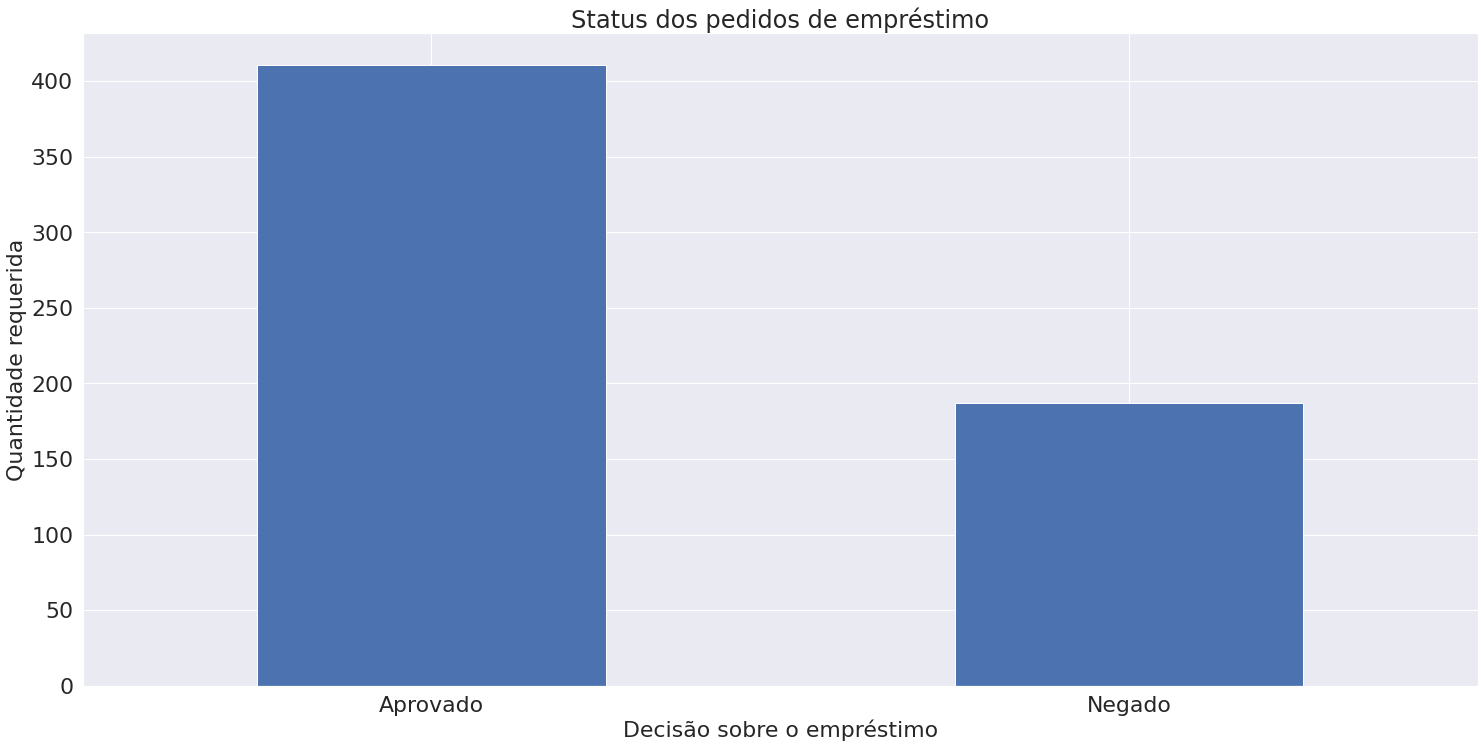

In [52]:
variavel_resposta = dados3.groupby('status_emprestimo')['id_emprestimo'].nunique()
#variavel_resposta.plot(kind='bar')
variavel_resposta.plot(kind='bar', fontsize=22)
plt.xticks(rotation=0)
plt.title('Status dos pedidos de empréstimo', fontsize=24)
plt.ylabel('Quantidade requerida', fontsize=22)
plt.xlabel('Decisão sobre o empréstimo', fontsize=22);

## Variável númerica

In [56]:
atributos_numericos.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
renda_requerente,5849.00,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,3200.0,2500.0,3073.0,1853.0,1299.0
renda_co-requerente,0.00,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,700.0,1840.0,8106.0,2840.0,1086.0
valor_emprestimo,146.41,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,70.0,109.0,200.0,114.0,17.0
prazo_emprestimo,360.00,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,120.0


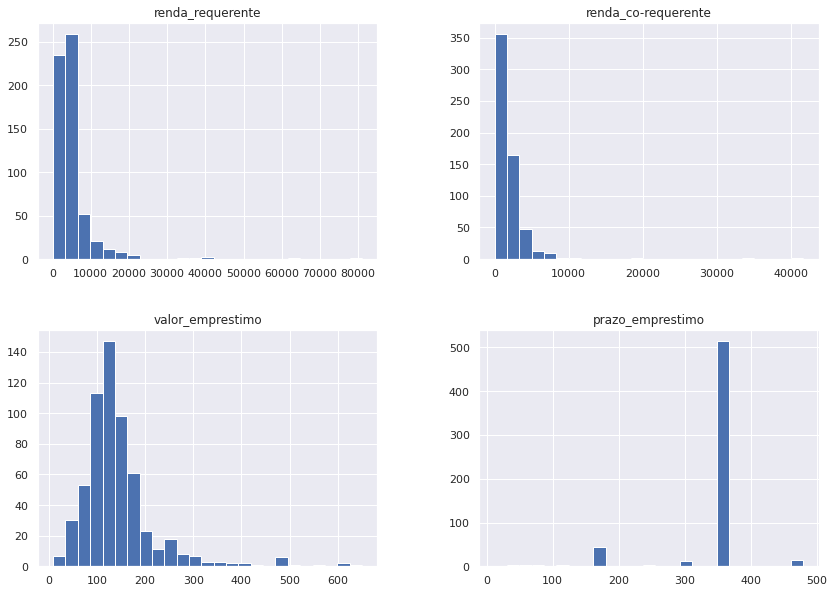

In [59]:
atributos_numericos.hist(bins=25, figsize=(14, 10));

Com os gráfico acima podemos concluir que:
* A maioria dos empréstimo tem um valor de aproximadamente R\$ 150,00
* A renda do requerente e co-requerente gira em torno de R\$ 3000,00
* Os empréstimo tem normalmente o prazo de 360 meses para pagar

## Variável categórica

In [62]:
atributos_categoricos.head(1)

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,Masculino,Não,0,Graduado,Não,Bom,Urbano,Aprovado


<AxesSubplot:xlabel='valor_emprestimo', ylabel='Density'>

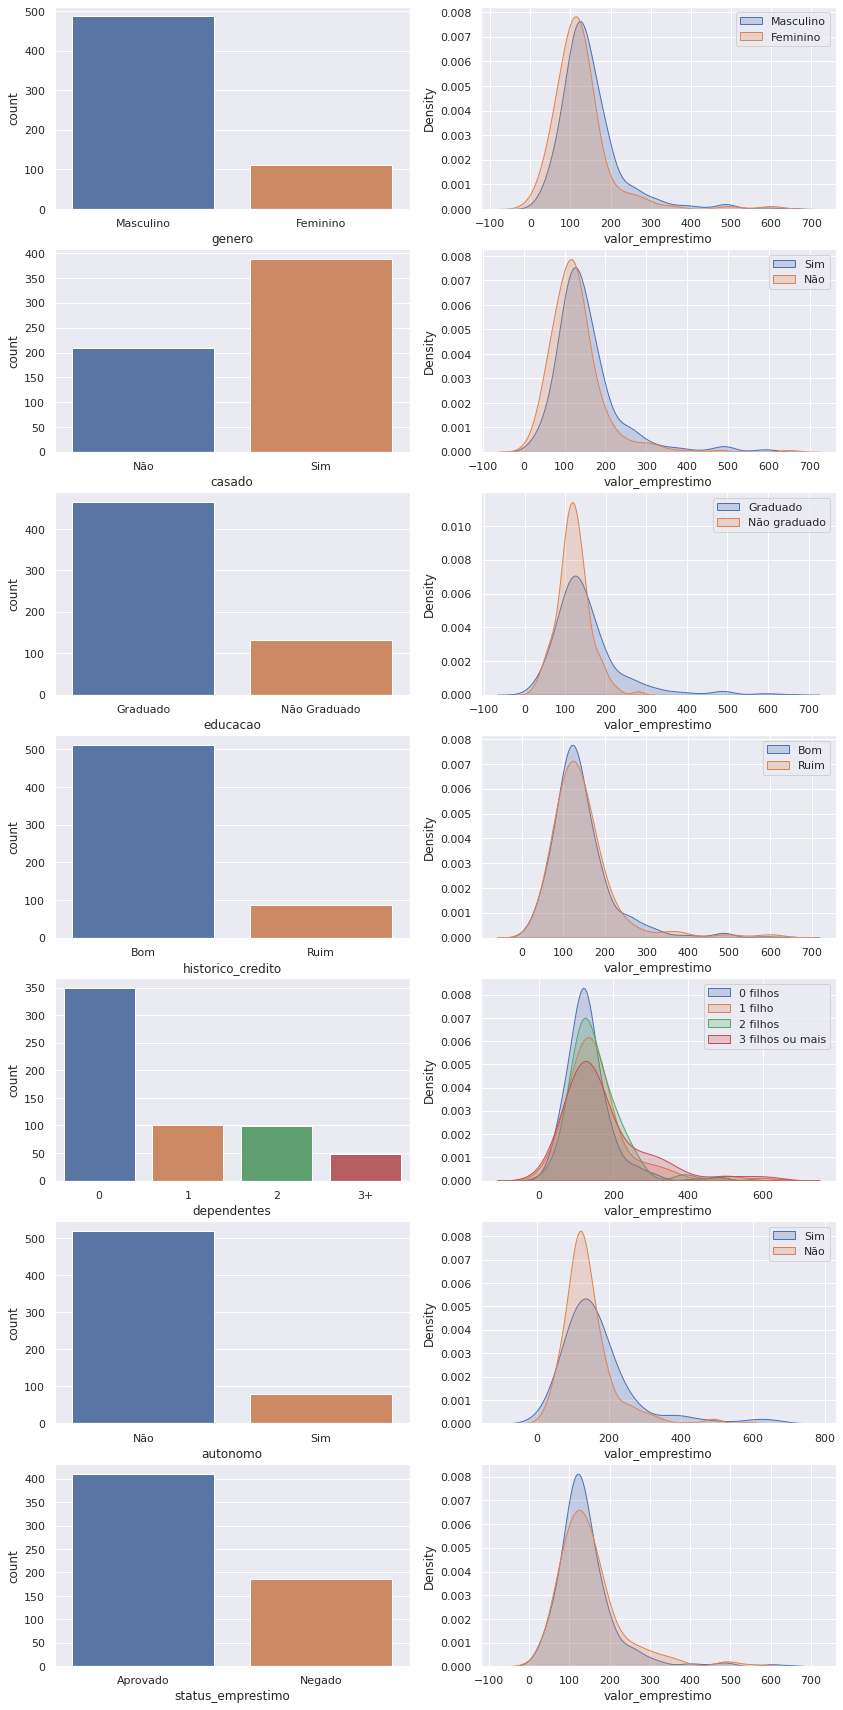

In [72]:
# genero
fig = plt.figure(figsize=(14, 35))
ax1 = fig.add_subplot(8, 2, 1)
sns.countplot(dados3['genero'], ax=ax1)

ax2 = fig.add_subplot(8, 2, 2)
sns.kdeplot(dados3[dados3['genero'] == 'Masculino']['valor_emprestimo'],
            label='Masculino', shade=True, ax=ax2)
sns.kdeplot(dados3[dados3['genero'] == 'Feminino']['valor_emprestimo'],
            label='Feminino', shade=True, ax=ax2)
ax2.legend()

# casado
ax3 = fig.add_subplot(8, 2, 3)
sns.countplot(dados3['casado'], ax=ax3)

ax4 = fig.add_subplot(8, 2, 4)
sns.kdeplot(dados3[dados3['casado'] == 'Sim']['valor_emprestimo'],
            label='Sim', shade=True, ax=ax4)
sns.kdeplot(dados3[dados3['casado'] == 'Não']['valor_emprestimo'],
            label='Não', shade=True, ax=ax4)

ax4.legend()

# educação
ax5 = fig.add_subplot(8, 2, 5)
sns.countplot(dados3['educacao'], ax=ax5)

ax6 = fig.add_subplot(8, 2, 6)
sns.kdeplot(dados3[dados3['educacao'] == 'Graduado']['valor_emprestimo'],
            label='Graduado', shade=True, ax=ax6)
sns.kdeplot(dados3[dados3['educacao'] == 'Não Graduado']['valor_emprestimo'],
            label='Não graduado', shade=True, ax=ax6)

ax6.legend()

# histórico de crédito
ax7 = fig.add_subplot(8, 2, 7)
sns.countplot(dados3['historico_credito'], ax=ax7)

ax8 = fig.add_subplot(8, 2, 8)
sns.kdeplot(dados3[dados3['historico_credito'] == 'Bom']['valor_emprestimo'],
            label='Bom', shade=True, ax=ax8)
sns.kdeplot(dados3[dados3['historico_credito'] == 'Ruim']['valor_emprestimo'],
            label='Ruim', shade=True, ax=ax8)

ax8.legend()

# dependentes
ax9 = fig.add_subplot(8, 2, 9)
sns.countplot(dados3['dependentes'], ax=ax9)

ax10 = fig.add_subplot(8, 2, 10)
sns.kdeplot(dados3[dados3['dependentes'] == '0']['valor_emprestimo'],
            label='0 filhos', shade=True, ax=ax10)
sns.kdeplot(dados3[dados3['dependentes'] == '1']['valor_emprestimo'],
            label='1 filho', shade=True, ax=ax10)
sns.kdeplot(dados3[dados3['dependentes'] == '2']['valor_emprestimo'],
            label='2 filhos', shade=True, ax=ax10)
sns.kdeplot(dados3[dados3['dependentes'] == '3+']['valor_emprestimo'],
            label='3 filhos ou mais', shade=True, ax=ax10)

ax10.legend()

# autonomo
ax11 = fig.add_subplot(8, 2, 11)
sns.countplot(dados3['autonomo'], ax=ax11)

ax12 = fig.add_subplot(8, 2, 12)
sns.kdeplot(dados3[dados3['autonomo'] == 'Sim']['valor_emprestimo'],
            label='Sim', shade=True, ax=ax12)
sns.kdeplot(dados3[dados3['autonomo'] == 'Não']['valor_emprestimo'],
            label='Não', shade=True, ax=ax12)

ax12.legend()

# tipo de propriedade
ax13 = fig.add_subplot(8, 2, 13)
sns.countplot(dados3['tipo_propriedade'], ax=ax13)

ax14 = fig.add_subplot(8, 2, 14)
sns.kdeplot(dados3[dados3['tipo_propriedade'] == 'Bom']['valor_emprestimo'],
            label='Bom', shade=True, ax=ax14)
sns.kdeplot(dados3[dados3['tipo_propriedade'] == 'Ruim']['valor_emprestimo'],
            label='Ruim', shade=True, ax=ax14)
    
# status do empréstimo
ax15 = fig.add_subplot(8, 2, 13)
sns.countplot(dados3['status_emprestimo'], ax=ax15)

ax16 = fig.add_subplot(8, 2, 14)
sns.kdeplot(dados3[dados3['status_emprestimo'] == 'Aprovado']['valor_emprestimo'],
            label='Aprovado', shade=True, ax=ax16)
sns.kdeplot(dados3[dados3['status_emprestimo'] == 'Negado']['valor_emprestimo'],
            label='Negado', shade=True, ax=ax16)
    
        

Com as análises feita acima, conseguimos ver em cada variável qual a categoria que tem a maior quantidade de dados e ver com está distribuida.

Sabemos que quem pede mais empréstimos são:
* Homens
* Casados
* Com boms histórico de crédito
* Que não são autônomos
* Sem filhos

## Análise bivariada

Agora veremos como as variáveis impactam na variável resposta. Para isso usaremos as hipóteses já criadas. Recapitulando elas:

1. Graduados tem maior chance de ter o empréstimo aprovado
2. Autônomos tem maior chance de ter o empréstimo negado
3. Pessoas com rendas maiores tem mais chance de ter o empréstimo aprovado
4. Valores de empréstimo baixo tem maior chance de ser aprovado

Outras hipóteses podem ser criadas, mas no ateremos a essas no momento.

### H1. Graduados tem maior chance de ter o empréstimo aprovado

In [100]:
dados_graduados_aprovado = dados3[dados3['status_emprestimo'].str.contains('Aprovado')]
dados_graduados_negado = dados3[dados3['status_emprestimo'].str.contains('Negado')]

In [101]:
aux1_h1 = dados_graduados_aprovado[['status_emprestimo', 'educacao']].groupby('educacao').count().reset_index()
aux2_h1 = dados_graduados_negado[['status_emprestimo', 'educacao']].groupby('educacao').count().reset_index()

Text(0.5, 1.0, 'Emprestimo negados')

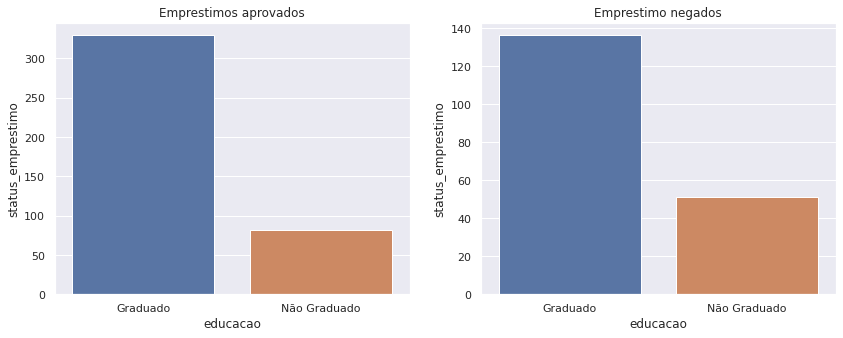

In [102]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x='educacao', y='status_emprestimo', data=aux1_h1, ax=ax1)
ax1.set_title('Emprestimos aprovados')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='educacao', y='status_emprestimo', data=aux2_h1, ax=ax2)
ax2.set_title('Emprestimo negados')

In [103]:
nao_graduados_aprovado = dados_graduados_aprovado[dados_graduados_aprovado['educacao'].str.contains('Não Graduado')]

In [113]:
porcentagem_nao_graduados_aprovados = (len(nao_graduados_aprovado)/len(dados_graduados_aprovado)) * 100
porcentagem_graduados_aprovados = 100 - porcentagem_nao_graduados_aprovados

print(f'A porcentagem de graduados com emprésitmo aprovado é de {porcentagem_graduados_aprovados:.2f}%')
print(f'A porcentagem de não graduados com emprésitmo aprovado é de {porcentagem_nao_graduados_aprovados:.2f}%')

A porcentagem de graduados com emprésitmo aprovado é de 80.05%
A porcentagem de não graduados com emprésitmo aprovado é de 19.95%


In [157]:
nao_graduados_negado = dados_graduados_negado[dados_graduados_negado['educacao'].str.contains('Não Graduado')]
porcentagem_nao_graduados_negado = (len(nao_graduados_negado)/len(dados_graduados_negado)) * 100
porcentagem_graduados_negado = 100 - porcentagem_nao_graduados_negado

print(f'A porcentagem de graduados com empréstimo aprovado é de {porcentagem_graduados_negado:.2f}%')
print(f'A porcentagem de não graduados com empréstimo aprovado é de {porcentagem_nao_graduados_negado:.2f}%')

A porcentagem de graduados com empréstimo aprovado é de 72.73%
A porcentagem de não graduados com empréstimo aprovado é de 27.27%


Vemos que a hipótese é verdadeira, graduados tem maior chance de aprovação de empréstimo. Além disso, eles diminuem sua porcentagem em empréstimo negados, saindo de 80,05% dos dados de aprovados para 72,73% de negados

### H2. Autônomos tem maior chance de ter o empréstimo negado

In [116]:
dados_aprovado = dados3[dados3['status_emprestimo'].str.contains('Aprovado')]
dados_negado = dados3[dados3['status_emprestimo'].str.contains('Negado')]

In [117]:
aux1_h2 = dados_aprovado[['status_emprestimo', 'autonomo']].groupby('autonomo').count().reset_index()
aux2_h2 = dados_negado[['status_emprestimo', 'autonomo']].groupby('autonomo').count().reset_index()

Text(0.5, 1.0, 'Emprestimo negados')

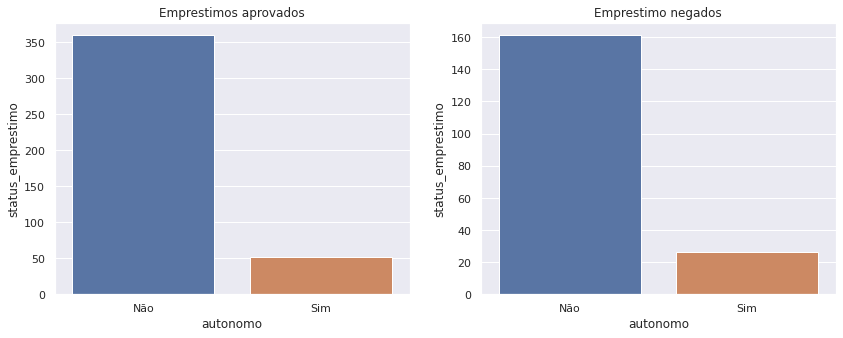

In [119]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x='autonomo', y='status_emprestimo', data=aux1_h2, ax=ax1)
ax1.set_title('Emprestimos aprovados')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='autonomo', y='status_emprestimo', data=aux2_h2, ax=ax2)
ax2.set_title('Emprestimo negados')

Aqui fica dificil decidir apenas com o gráfico, então veremos isso com porcentagem.

In [128]:
autonomos_aprovado = dados_aprovado[dados_aprovado['autonomo'].str.contains('Sim')]
autonomos_negado = dados_negado[dados_negado['autonomo'].str.contains('Sim')]

In [156]:
porcentagem_autonomo_aprovados = (len(autonomos_aprovado)/ (len(autonomos_aprovado) + len(autonomos_negado))) * 100
porcentagem_autonomo_negado = (len(autonomos_negado)/(len(autonomos_aprovado) + len(autonomos_negado))) * 100

print(f'A porcentagem de autonomos com empréstimo aprovado é de {porcentagem_autonomo_aprovados:.2f}%')
print(f'A porcentagem de autonomos com empréstimo negado é de {porcentagem_autonomo_negado:.2f}%')

A porcentagem de autonomos com empréstimo aprovado é de 66.67%
A porcentagem de autonomos com empréstimo negado é de 33.33%


Logo vemos que a hipótese é falsa, já que autonomos tem 66,67% de chance de ter o empréstimo aprovado.

### H3. Pessoas com rendas maiores tem mais chance de ter o empréstimo aprovado

Aqui nos consideraremos a média como uma renda de parâmetro. Abaixo da média é uma renda menor, acima da média é uma renda maior.

In [132]:
dados3['renda_requerente'].mean()

5292.252508361204

Text(0.5, 1.0, 'Emprestimos negados')

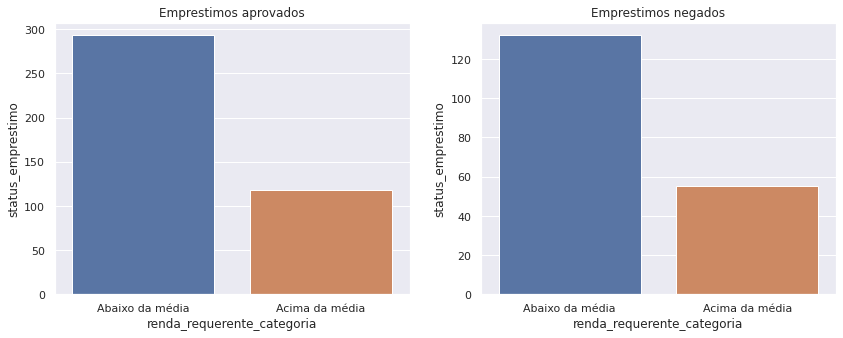

In [147]:
dados3['renda_requerente_categoria'] = dados3['renda_requerente'].apply(lambda x: 1 if x > 5292.25 else 0) 
dados3 ['renda_requerente_categoria'] = dados3['renda_requerente_categoria'].replace({0: 'Abaixo da média', 1: 'Acima da média'})

dados_aprovado = dados3[dados3['status_emprestimo'].str.contains('Aprovado')]
dados_negado = dados3[dados3['status_emprestimo'].str.contains('Negado')]

aux1_h3 = dados_aprovado[['status_emprestimo', 'renda_requerente_categoria']].groupby('renda_requerente_categoria').count().reset_index()
aux2_h3 = dados_negado[['status_emprestimo', 'renda_requerente_categoria']].groupby('renda_requerente_categoria').count().reset_index()

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x='renda_requerente_categoria', y='status_emprestimo', data=aux1_h3, ax=ax1)
ax1.set_title('Emprestimos aprovados')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='renda_requerente_categoria', y='status_emprestimo', data=aux2_h3, ax=ax2)
ax2.set_title('Emprestimos negados')

In [155]:
renda_abaixo_aprovado = dados_aprovado[dados_aprovado['renda_requerente_categoria'].str.contains('Abaixo da média')]
renda_acima_aprovado = dados_aprovado[dados_aprovado['renda_requerente_categoria'].str.contains('Acima da média')]

renda_abaixo_negado = dados_negado[dados_negado['renda_requerente_categoria'].str.contains('Abaixo da média')]
renda_acima_negado = dados_negado[dados_negado['renda_requerente_categoria'].str.contains('Acima da média')]


porcentagem_renda_abaixo_aprovados = (len(renda_abaixo_aprovado)/ (len(renda_abaixo_aprovado) + len(renda_abaixo_negado))) * 100
porcentagem_renda_abaixo_negado = (len(renda_abaixo_negado)/(len(renda_abaixo_aprovado) + len(renda_abaixo_negado))) * 100

porcentagem_renda_acima_aprovados = (len(renda_acima_aprovado)/ (len(renda_acima_aprovado) + len(renda_acima_negado))) * 100
porcentagem_renda_acima_negado = (len(renda_acima_negado)/(len(renda_acima_aprovado) + len(renda_acima_negado))) * 100

print(f'A porcentagem de requerentes com renda acima da média com empréstimo aprovado é de {porcentagem_renda_acima_aprovados:.2f}%')
print(f'A porcentagem de requerente com renda abaixo da média com empréstimo negado é de {porcentagem_renda_abaixo_aprovados:.2f}%')

A porcentagem de requerentes com renda acima da média com empréstimo aprovado é de 68.21%
A porcentagem de requerente com renda abaixo da média com empréstimo negado é de 68.94%


Hipótese falsa. Por mais que seja um porcentagem muito próxima, é mais provável as pessoas com renda abaixo da média terem o empréstimo aceito do que as de renda acima da média.

### H4. Valores de empréstimo baixo tem maior chance de ser aprovado

In [150]:
dados3['valor_emprestimo'].mean()

145.01941471571914

Text(0.5, 1.0, 'Emprestimos negados')

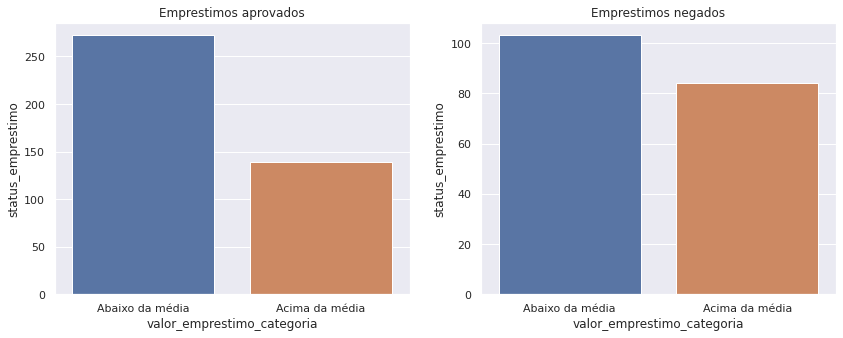

In [152]:
dados3['valor_emprestimo_categoria'] = dados3['valor_emprestimo'].apply(lambda x: 1 if x > 145 else 0) 
dados3 ['valor_emprestimo_categoria'] = dados3['valor_emprestimo_categoria'].replace({0: 'Abaixo da média', 1: 'Acima da média'})

dados_aprovado = dados3[dados3['status_emprestimo'].str.contains('Aprovado')]
dados_negado = dados3[dados3['status_emprestimo'].str.contains('Negado')]

aux1_h3 = dados_aprovado[['status_emprestimo', 'valor_emprestimo_categoria']].groupby('valor_emprestimo_categoria').count().reset_index()
aux2_h3 = dados_negado[['status_emprestimo', 'valor_emprestimo_categoria']].groupby('valor_emprestimo_categoria').count().reset_index()

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x='valor_emprestimo_categoria', y='status_emprestimo', data=aux1_h3, ax=ax1)
ax1.set_title('Emprestimos aprovados')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='valor_emprestimo_categoria', y='status_emprestimo', data=aux2_h3, ax=ax2)
ax2.set_title('Emprestimos negados')

In [154]:
valor_abaixo_aprovado = dados_aprovado[dados_aprovado['valor_emprestimo_categoria'].str.contains('Abaixo da média')]
valor_acima_aprovado = dados_aprovado[dados_aprovado['valor_emprestimo_categoria'].str.contains('Acima da média')]

valor_abaixo_negado = dados_negado[dados_negado['valor_emprestimo_categoria'].str.contains('Abaixo da média')]
valor_acima_negado = dados_negado[dados_negado['valor_emprestimo_categoria'].str.contains('Acima da média')]


porcentagem_valor_abaixo_aprovados = (len(valor_abaixo_aprovado)/ (len(valor_abaixo_aprovado) + len(valor_abaixo_negado))) * 100
porcentagem_valor_abaixo_negado = (len(valor_abaixo_negado)/(len(valor_abaixo_aprovado) + len(valor_abaixo_negado))) * 100

porcentagem_valor_acima_aprovados = (len(valor_acima_aprovado)/ (len(valor_acima_aprovado) + len(valor_acima_negado))) * 100
porcentagem_valor_acima_negado = (len(valor_acima_negado)/(len(valor_acima_aprovado) + len(valor_acima_negado))) * 100

print(f'A porcentagem de empréstimo aprovado com valor acima da média é de {porcentagem_valor_acima_aprovados:.2f}%')
print(f'A porcentagem de empréstimo aprovado com valor abaixo da média é de {porcentagem_valor_abaixo_aprovados:.2f}%')

A porcentagem de empréstimo aprovado com valor acima da média é de 62.33%
A porcentagem de empréstimo aprovado com valor abaixo da média é de 72.53%


Hipótese verdadeira. Empréstimos de valor mais baixo tem maior chance de aprovação

Recapitulando as hipóteses sabendo se são verdadeira ou falsas
1. Graduados tem maior chance de ter o empréstimo aprovado (Verdadeira)
2. Autônomos tem maior chance de ter o empréstimo negado (Falsa)
3. Pessoas com rendas maiores tem mais chance de ter o empréstimo aprovado (Falsa)
4. Valores de empréstimo baixo tem maior chance de ser aprovado (Verdadeira)

## Análise multivariada

A análise multivariada ajuda a olhar quais varias possuem correlação

### Atributos númericos

<AxesSubplot:>

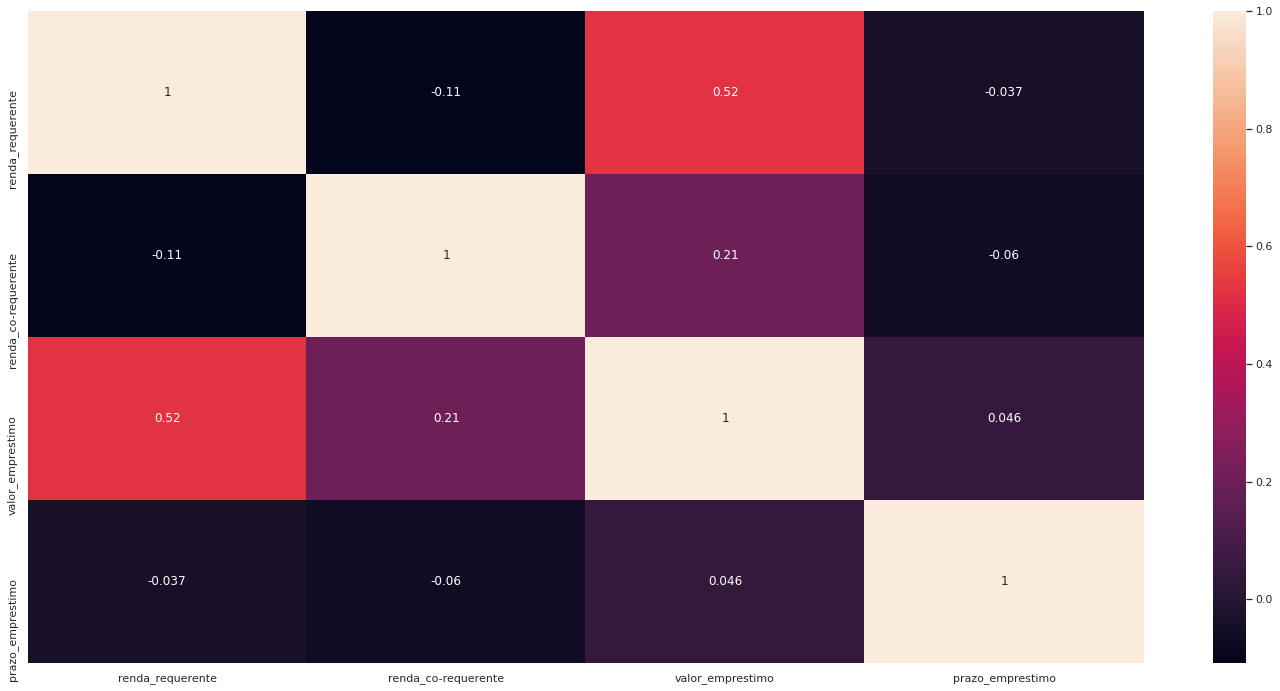

In [158]:
correlacao_numerica = atributos_numericos.corr(method='pearson')
sns.heatmap(correlacao_numerica, annot=True)

* Correlação proximas de 1 são correlações fortes positivas, o que quer dizer que quando uma variável cresce a outra cresce junta. 
* Correlações próximas de -1 são correlações fortes negativas, o que quer dizer que quando uma variável cresce a outra diminuí.
* Correlações pŕoximas de 0 são correlações nulas, uma variável não interfere na outra.

### Atributos categóricos

In [159]:
atributos_categoricos.head()

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,Masculino,Não,0,Graduado,Não,Bom,Urbano,Aprovado
1,LP001003,Masculino,Sim,1,Graduado,Não,Bom,Rural,Negado
2,LP001005,Masculino,Sim,0,Graduado,Sim,Bom,Urbano,Aprovado
3,LP001006,Masculino,Sim,0,Não Graduado,Não,Bom,Urbano,Aprovado
4,LP001008,Masculino,Não,0,Graduado,Não,Bom,Urbano,Aprovado


Usaremos o método de correlação [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) para variáveis categóricas.

In [160]:
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    
    kcorr = k - (k-1)**2 / (n-1)
    rcorr = r - (r-1)**2 / (n-1)
    
    return np.sqrt((chi2corr/n) / min(kcorr - 1, rcorr - 1))

In [161]:
atributos_categoricos.head(1)

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,Masculino,Não,0,Graduado,Não,Bom,Urbano,Aprovado


In [163]:
# genero
atr_cat_1 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['genero'])
atr_cat_2 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['casado'])
atr_cat_3 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['dependentes'])
atr_cat_4 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['educacao'])
atr_cat_5 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['autonomo'])
atr_cat_6 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['historico_credito'])
atr_cat_7 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['tipo_propriedade'])
atr_cat_8 = cramer_v(atributos_categoricos['genero'], atributos_categoricos['status_emprestimo'])

#casado
atr_cat_9 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['genero'])
atr_cat_10 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['casado'])
atr_cat_11 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['dependentes'])
atr_cat_12 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['educacao'])
atr_cat_13 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['autonomo'])
atr_cat_14 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['historico_credito'])
atr_cat_15 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['tipo_propriedade'])
atr_cat_16 = cramer_v(atributos_categoricos['casado'], atributos_categoricos['status_emprestimo'])

# dependentes
atr_cat_17 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['genero'])
atr_cat_18 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['casado'])
atr_cat_19 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['dependentes'])
atr_cat_20 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['educacao'])
atr_cat_21 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['autonomo'])
atr_cat_22 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['historico_credito'])
atr_cat_23 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['tipo_propriedade'])
atr_cat_24 = cramer_v(atributos_categoricos['dependentes'], atributos_categoricos['status_emprestimo'])

# educacao
atr_cat_25 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['genero'])
atr_cat_26 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['casado'])
atr_cat_27 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['dependentes'])
atr_cat_28 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['educacao'])
atr_cat_29 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['autonomo'])
atr_cat_30 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['historico_credito'])
atr_cat_31 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['tipo_propriedade'])
atr_cat_32 = cramer_v(atributos_categoricos['educacao'], atributos_categoricos['status_emprestimo'])

# autonomo
atr_cat_33 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['genero'])
atr_cat_34 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['casado'])
atr_cat_35 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['dependentes'])
atr_cat_36 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['educacao'])
atr_cat_37 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['autonomo'])
atr_cat_38 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['historico_credito'])
atr_cat_39 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['tipo_propriedade'])
atr_cat_40 = cramer_v(atributos_categoricos['autonomo'], atributos_categoricos['status_emprestimo'])

# historico_credito
atr_cat_41 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['genero'])
atr_cat_42 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['casado'])
atr_cat_43 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['dependentes'])
atr_cat_44 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['educacao'])
atr_cat_45 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['autonomo'])
atr_cat_46 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['historico_credito'])
atr_cat_47 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['tipo_propriedade'])
atr_cat_48 = cramer_v(atributos_categoricos['historico_credito'], atributos_categoricos['status_emprestimo'])

# tipo_propriedade
atr_cat_49 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['genero'])
atr_cat_50 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['casado'])
atr_cat_51 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['dependentes'])
atr_cat_52 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['educacao'])
atr_cat_53 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['autonomo'])
atr_cat_54 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['historico_credito'])
atr_cat_55 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['tipo_propriedade'])
atr_cat_56 = cramer_v(atributos_categoricos['tipo_propriedade'], atributos_categoricos['status_emprestimo'])

# status_emprestimo
atr_cat_57 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['genero'])
atr_cat_58 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['casado'])
atr_cat_59 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['dependentes'])
atr_cat_60 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['educacao'])
atr_cat_61 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['autonomo'])
atr_cat_62 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['historico_credito'])
atr_cat_63 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['tipo_propriedade'])
atr_cat_64 = cramer_v(atributos_categoricos['status_emprestimo'], atributos_categoricos['status_emprestimo'])

df_atr_cat = pd.DataFrame({'genero': [atr_cat_1, atr_cat_2, atr_cat_3, atr_cat_4,
                                      atr_cat_5, atr_cat_6, atr_cat_7, atr_cat_8],
                           'casado': [atr_cat_9, atr_cat_10, atr_cat_11, atr_cat_12,
                                      atr_cat_13, atr_cat_14, atr_cat_15, atr_cat_16],
                           'dependentes': [atr_cat_17, atr_cat_18, atr_cat_19, atr_cat_20,
                                          atr_cat_21, atr_cat_22, atr_cat_23, atr_cat_24],
                           'educacao': [atr_cat_25, atr_cat_26, atr_cat_27, atr_cat_28,
                                       atr_cat_29, atr_cat_30, atr_cat_31, atr_cat_32],
                           'autonomo': [atr_cat_33, atr_cat_34, atr_cat_35, atr_cat_36,
                                       atr_cat_37, atr_cat_38, atr_cat_39, atr_cat_40],
                           'historico_credito': [atr_cat_41, atr_cat_42, atr_cat_43, atr_cat_44,
                                       atr_cat_45, atr_cat_46, atr_cat_47, atr_cat_48],
                           'tipo_propriedade': [atr_cat_49, atr_cat_50, atr_cat_51, atr_cat_52,
                                               atr_cat_53, atr_cat_54, atr_cat_55, atr_cat_56],
                           'status_emprestimo': [atr_cat_57, atr_cat_58, atr_cat_59, atr_cat_60,
                                                atr_cat_61, atr_cat_62, atr_cat_63, atr_cat_64]
                          })
df_atr_cat = df_atr_cat.set_index(df_atr_cat.columns)
df_atr_cat

,genero,casado,dependentes,educacao,autonomo,historico_credito,tipo_propriedade,status_emprestimo
genero,0.995301,0.365409,0.178136,0.043311,0.000000,0.006368,0.112750,0.016530
casado,0.365409,0.997164,0.367774,0.010026,0.000000,0.012874,0.011779,0.089464
dependentes,0.178136,0.367774,1.002518,0.066882,0.097755,0.074452,0.073026,0.089112
educacao,0.043311,0.010026,0.066882,0.995998,0.000708,0.061600,0.071462,0.077327
autonomo,0.000000,0.000000,0.097755,0.000708,0.993459,0.003635,0.031888,0.011766
historico_credito,0.006368,0.012874,0.074452,0.061600,0.003635,0.994041,0.042916,0.530941
tipo_propriedade,0.112750,0.011779,0.073026,0.071462,0.031888,0.042916,1.001676,0.140849
status_emprestimo,0.016530,0.089464,0.089112,0.077327,0.011766,0.530941,0.140849,0.996944


<AxesSubplot:>

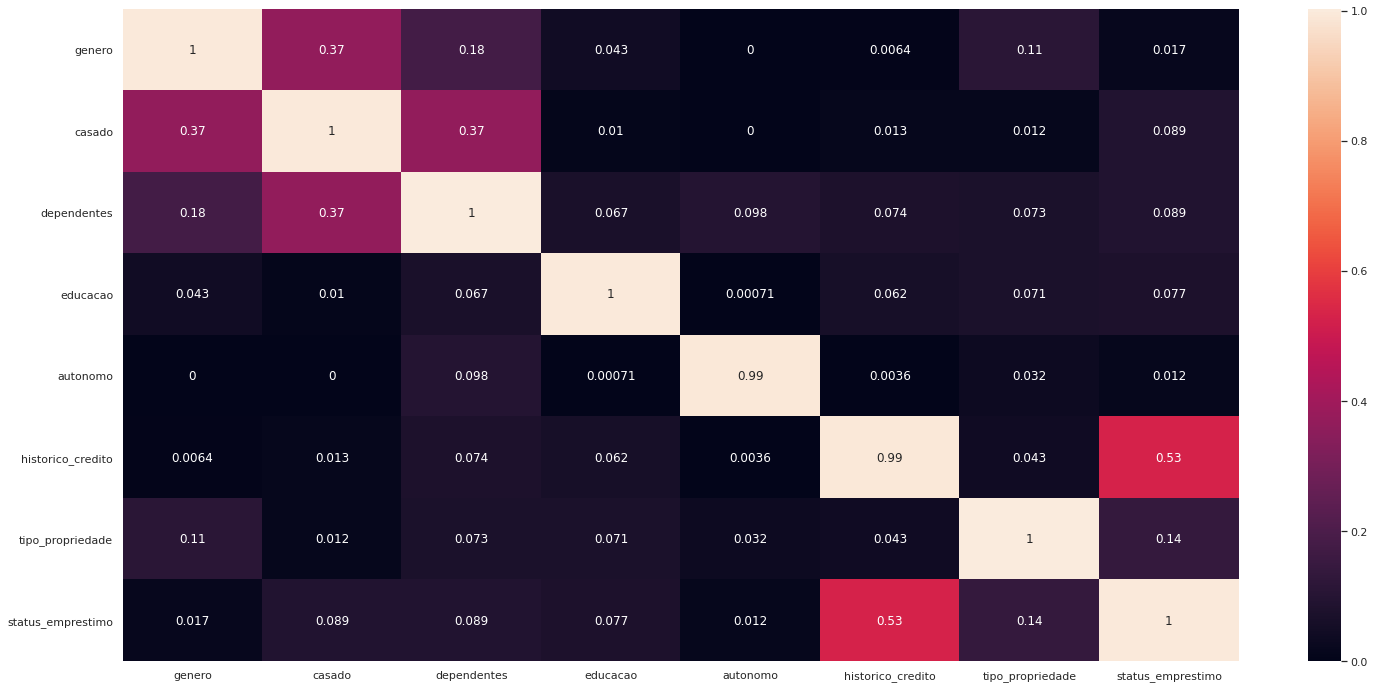

In [164]:
sns.heatmap(df_atr_cat, annot=True)

Avaliando apenas a variável resposta, `status_emprestimo`, vemos que a variável `histórico_credito` possui boa correlação com ela.

# Preparação dos dados

In [210]:
dados4 = dados3.copy()
dados4.head()

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_co-requerente,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo,renda_requerente_categoria,valor_emprestimo_categoria
0,LP001002,Masculino,Não,0,Graduado,Não,5849,0.0,146.41,360.0,Bom,Urbano,Aprovado,Acima da média,Acima da média
1,LP001003,Masculino,Sim,1,Graduado,Não,4583,1508.0,128.00,360.0,Bom,Rural,Negado,Abaixo da média,Abaixo da média
2,LP001005,Masculino,Sim,0,Graduado,Sim,3000,0.0,66.00,360.0,Bom,Urbano,Aprovado,Abaixo da média,Abaixo da média
3,LP001006,Masculino,Sim,0,Não Graduado,Não,2583,2358.0,120.00,360.0,Bom,Urbano,Aprovado,Abaixo da média,Abaixo da média
4,LP001008,Masculino,Não,0,Graduado,Não,6000,0.0,141.00,360.0,Bom,Urbano,Aprovado,Acima da média,Abaixo da média


Vamos excluir a coluna que criamos para a análise exploratória dos dados

In [211]:
dados4 = dados4.drop(['renda_requerente_categoria', 'valor_emprestimo_categoria'], axis=1)

Faremos o encoding das variáveis categóricas

In [212]:
# genero
dados4['genero'] = dados4['genero'].map({'Masculino': 1, 'Feminino': 0 })

# casado
dados4['casado'] = dados4['casado'].map({'Sim': 1, 'Não': 0 })

# educação
dados4['educacao'] = dados4['educacao'].map({'Graduado': 1, 'Não Graduado': 0 })

# dependentes
dados4['dependentes'] = dados4['dependentes'].map({'0': 0, '1': 1, '2': 2, '3+': 3 })

# autonomo
dados4['autonomo'] = dados4['autonomo'].map({'Sim': 1, 'Não': 0 })

# Histórico crédito
dados4['historico_credito'] = dados4['historico_credito'].map({'Bom': 1, 'Ruim': 0 })

# tipo de propriedade
dados4['tipo_propriedade'] = dados4['tipo_propriedade'].map({'Rural': 0, 'Semi-urbano': 1, 'Urbano': 2})

# status do empréstimo
dados4['status_emprestimo'] = dados4['status_emprestimo'].map({'Aprovado': 1, 'Negado': 0 })

dados4.head()

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_co-requerente,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo
0,LP001002,1,0,0,1,0,5849,0.0,146.41,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.00,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.00,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.00,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.00,360.0,1,2,1


## Dividindo os dados em treino e teste

In [213]:
x = dados4.drop(['id_emprestimo', 'status_emprestimo'], axis=1)
y = dados4['status_emprestimo']

In [214]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

Carregando os dados de validação

In [335]:
dados_validacao = pd.read_csv('Dados/teste.csv')

# renomeando as colunas
dados_validacao.columns = ['id_emprestimo', 'genero', 'casado', 'dependentes', 'educacao',
                  'autonomo', 'renda_requerente', 'renda_co-requerente', 'valor_emprestimo',
                  'prazo_emprestimo', 'historico_credito', 'tipo_propriedade']

dados_validacao = dados_validacao.drop('id_emprestimo', axis=1)

dados_validacao['genero'] = dados_validacao['genero'].replace(['Male', 'Female'], ['Masculino', 'Feminino'])
dados_validacao['educacao'] = dados_validacao['educacao'].replace(['Graduate', 'Not Graduate'],
                                                ['Graduado', 'Não Graduado'])
# rural é escrito da mesma forma
dados_validacao['tipo_propriedade'] = dados_validacao['tipo_propriedade'].replace(['Urban', 'Semiurban'],
                                                                ['Urbano', 'Semi-urbano'])
dados_validacao['casado'] = dados_validacao['casado'].replace(['Yes', 'No'], ['Sim', 'Não'])
dados_validacao['autonomo'] = dados_validacao['autonomo'].replace(['Yes', 'No'], ['Sim', 'Não'])
dados_validacao['historico_credito'] = dados_validacao['historico_credito'].replace([1.0, 0.0],
                                                                        ['Bom', 'Ruim'])

# genero
dados_validacao['genero'] = dados_validacao['genero'].map({'Masculino': 1, 'Feminino': 0 })

# casado
dados_validacao['casado'] = dados_validacao['casado'].map({'Sim': 1, 'Não': 0 })

# educação
dados_validacao['educacao'] = dados_validacao['educacao'].map({'Graduado': 1, 'Não Graduado': 0 })

# dependentes
dados_validacao['dependentes'] = dados_validacao['dependentes'].map({'0': 0, '1': 1, '2': 2, '3+': 3 })

# autonomo
dados_validacao['autonomo'] = dados_validacao['autonomo'].map({'Sim': 1, 'Não': 0 })

# Histórico crédito
dados_validacao['historico_credito'] = dados_validacao['historico_credito'].map({'Bom': 1, 'Ruim': 0 })

# tipo de propriedade
dados_validacao['tipo_propriedade'] = dados_validacao['tipo_propriedade'].map({'Rural': 0, 'Semi-urbano': 1, 'Urbano': 2})

dados_validacao.head()

,genero,casado,dependentes,educacao,autonomo,renda_requerente,renda_co-requerente,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2


Vendo se a valores ausentes nos dados de validação

In [336]:
dados_validacao.isna().sum()

genero                 11
casado                  0
dependentes            10
educacao                0
autonomo               23
renda_requerente        0
renda_co-requerente     0
valor_emprestimo        5
prazo_emprestimo        6
historico_credito      29
tipo_propriedade        0
dtype: int64

Como esses dados servem apenas para validar depois de treinar e testar, vamos retirar todas as linhas em branco

In [337]:
dados_validacao = dados_validacao.dropna()

In [338]:
dados_validacao.isna().sum()

genero                 0
casado                 0
dependentes            0
educacao               0
autonomo               0
renda_requerente       0
renda_co-requerente    0
valor_emprestimo       0
prazo_emprestimo       0
historico_credito      0
tipo_propriedade       0
dtype: int64

## As variáveis selecionadas são significativas? 

Veremos se as variáveis selecionadas são significativas com testes estatísticos usando o `statsmodels` 

In [225]:
# adicionando a constante
x_treino_constante = sm.add_constant(x_treino)

# trainando o modelo OLS
modelo_statsmodels = sm.Logit(y_treino, x_treino_constante).fit()

modelo_statsmodels.summary()

Optimization terminated successfully.
         Current function value: 0.469738
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      status_emprestimo   No. Observations:                  478
Model:                          Logit   Df Residuals:                      466
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.2488
Time:                        21:45:41   Log-Likelihood:                -224.53
converged:                       True   LL-Null:                       -298.92
Covariance Type:            nonrobust   LLR p-value:                 2.668e-26
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1424      0.920     -2.330      0.020      -3.945      -0.340
genero                 -0.1298      0.322     -0.402      0.687      -0.762       0.502
casado                  0.4392      0.272      1.613      0.107      -0.094       0.973
dependentes             0.0172      0.132      0.130      0.896      -0.242       0.276
educacao                0.4842      0.285      1.697      0.090      -0.075       1.043
autonomo                0.0031      0.366      0.008      0.993      -0.714       0.721
renda_requerente    -1.673e-05   2.99e-05     -0.559      0.576   -7.54e-05    4.19e-05
renda_co-requerente -4.533e-05   3.97e-05     -1.141      0.254      -0.000    3.25e-05
valor_emprestimo       -0.0017      0.002     -0.953      0.341      -0.005       0.002
prazo_emprestimo       -0.0021      0.002     -0.998      0.318      -0.006       0.002
historico_credito       3.7870      0.452      8.385      0.000       2.902       4.672
tipo_propriedade        0.2609      0.154      1.693      0.090      -0.041       0.563
=======================================================================================
"""

Com esse modelo criado pelo `statsmodels`, já somos capazes de fazer uma previsão. Vamos criar um função para fazer a previsão.

In [299]:
def confusion_matrix_manual(data,actual_values,model):
        
        # Prediz os valores usando o modelo Logit
        pred_values = model.predict(data)
        
        # Especifica os  bins
        bins=np.array([0,0.5,1])
        
        # Crie um histograma, onde se os valores estiverem entre 0 e 0,5 será considerado 0 
        # se estiverem entre 0,5 e 1, serão considerados 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        
        # coloca os valores num DataFrame
        cm_df = pd.DataFrame(cm)
        cm_df.columns = ['Predição de empréstimo negado', 'Predição de empréstimo aprovado']
        cm_df = cm_df.rename(index={0: 'Empréstimo negado real', 1: 'Empréstimo aprovado real'})
        accuracy = accuracy * 100
        print(f'A acurácia do modelo é de {accuracy:.2f} %')
        return cm_df

In [300]:
confusion_matrix_manual(x_treino_constante, y_treino, modelo_statsmodels)

A acurácia do modelo é de 80.75 %


,Predição de empréstimo negado,Predição de empréstimo aprovado
Empréstimo negado real,66.0,86.0
Empréstimo aprovado real,6.0,320.0


Nosso modelo é muito bom para aprovar empréstimos, acertando em 98% nos empréstimos que deveriam ser aprovados, porém na hora de negar, ele não se mostrou tão bom, negando apenas 43,42% dos empréstimos que deveria. Vamos pensar em padronizar os dados para vê melhora.

## Feature enginnering

Antes de padronizar os dados, vamos criar uma variável nova derivada de duas. As variáveis `renda_requerente` e `renda_co-requerente` nos dão a renda total que será utilizada para poder aprovar ou não o empréstimo. Logo criaremos uma variável que incluirá essas duas.

In [301]:
dados4['renda_total'] = dados4['renda_requerente'] + dados4['renda_co-requerente']
dados4.head()

KeyError: 'renda_requerente'

Com essa nova variável, podemos excluir as duas que derivaram ela.

In [302]:
dados4 = dados4.drop(['renda_requerente', 'renda_co-requerente'], axis=1)
dados4.head(1)

KeyError: "['renda_requerente' 'renda_co-requerente'] not found in axis"

## Padronização dos dados

In [303]:
dados_padronizados = dados4.copy()
dados_padronizados.head(1)

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo,renda_total
0,LP001002,1,0,0,1,0,146.41,360.0,1,2,1,5849.0


In [304]:
dados_padronizados['valor_emprestimo']=(dados_padronizados['valor_emprestimo']-dados_padronizados['valor_emprestimo'].min())/(dados_padronizados['valor_emprestimo'].max()-dados_padronizados['valor_emprestimo'].min())
dados_padronizados['prazo_emprestimo']=(dados_padronizados['prazo_emprestimo']-dados_padronizados['prazo_emprestimo'].min())/(dados_padronizados['prazo_emprestimo'].max()-dados_padronizados['prazo_emprestimo'].min())
dados_padronizados['renda_total']=(dados_padronizados['renda_total']-dados_padronizados['renda_total'].min())/(dados_padronizados['renda_total'].max()-dados_padronizados['renda_total'].min())
dados_padronizados.head()

,id_emprestimo,genero,casado,dependentes,educacao,autonomo,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,status_emprestimo,renda_total
0,LP001002,1,0,0,1,0,0.214368,0.74359,1,2,1,0.055394
1,LP001003,1,1,1,1,0,0.185647,0.74359,1,0,0,0.058435
2,LP001005,1,1,0,1,1,0.088924,0.74359,1,2,1,0.019583
3,LP001006,1,1,0,0,0,0.173167,0.74359,1,2,1,0.043980
4,LP001008,1,0,0,1,0,0.205928,0.74359,1,2,1,0.057292


Como os dados padronizados faremos de novo a predição com `statsmodels`

In [305]:
x = dados_padronizados.drop(['id_emprestimo', 'status_emprestimo'], axis=1)
y = dados_padronizados['status_emprestimo']

In [306]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [307]:
# adicionando a constante
x_treino_constante = sm.add_constant(x_treino)

# trainando o modelo OLS
modelo_statsmodels = sm.Logit(y_treino, x_treino_constante).fit()

modelo_statsmodels.summary()

Optimization terminated successfully.
         Current function value: 0.470254
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      status_emprestimo   No. Observations:                  478
Model:                          Logit   Df Residuals:                      467
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Oct 2021   Pseudo R-squ.:                  0.2480
Time:                        22:45:06   Log-Likelihood:                -224.78
converged:                       True   LL-Null:                       -298.92
Covariance Type:            nonrobust   LLR p-value:                 8.463e-27
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2406      0.893     -2.510      0.012      -3.990      -0.491
genero               -0.1344      0.322     -0.418      0.676      -0.765       0.496
casado                0.4394      0.272      1.613      0.107      -0.095       0.973
dependentes           0.0097      0.131      0.074      0.941      -0.248       0.267
educacao              0.4753      0.285      1.670      0.095      -0.082       1.033
autonomo              0.0262      0.365      0.072      0.943      -0.688       0.741
valor_emprestimo     -1.0185      1.140     -0.893      0.372      -3.253       1.216
prazo_emprestimo     -0.9429      0.978     -0.964      0.335      -2.859       0.973
historico_credito     3.7848      0.452      8.380      0.000       2.900       4.670
tipo_propriedade      0.2619      0.154      1.701      0.089      -0.040       0.564
renda_total          -1.9702      2.186     -0.901      0.367      -6.254       2.314
=====================================================================================
"""

In [308]:
confusion_matrix_manual(x_treino_constante, y_treino, modelo_statsmodels)

A acurácia do modelo é de 80.75 %


,Predição de empréstimo negado,Predição de empréstimo aprovado
Empréstimo negado real,66.0,86.0
Empréstimo aprovado real,6.0,320.0


O modelo continua dandos o mesmos valores. Vamos partir para o `sklearn`

## Estimando o modelo de regressão logística 

In [266]:
# criando o modelo
reg_log = LogisticRegression()

# treinando o modelo
reg_log.fit(x_treino, y_treino)

# fazendo a predição
y_pred = reg_log.predict(x_teste)

Vamos ver a acurácia do modelo. Acurácia é a quantidade de acertos do nosso modelo divido pelo total da amostra. Ela nos dá a capacidade de saber o qual certo está nosso modelo.

In [296]:
print(f'Acurácia do treino: {reg_log.score(x_teste, y_teste) * 100:.2f}%')

Acurácia do treino: 81.67%


Nosso modelo tem uma acurácia de 81,67%, que é maior que a acurácia do modelo do `statsmodels`

In [274]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.99      0.88        85

    accuracy                           0.82       120
   macro avg       0.87      0.69      0.72       120
weighted avg       0.84      0.82      0.79       120



Falando sobre as métricas acima

* **Precisão**: Mostra quantos acertos o algoritmo teve para o esperado considerando o valor total real. por exemplo nosso algoritmo previu 100 valores como verdadeiro positivo (em nosso caso quando o  modelo diz que tem que dar o empréstimo e na vida real deu o empréstimo) e 25 como falso positivo (quando o modelo diz que deve dar o empréstimo quando na vida real não se deu o emprestimo). Logo a fórmula fica

$$ \textbf{precisão} = \frac{\textbf{verdadeiro positivo}}{\textbf{falso positivo + verdadeiro positivo}}$$

* **recall**: Mostra a proporção de verdadeiros positivos entre todas as observações que realmente são positivas. Por exemplo nosso algoritmo previu 100 valores como verdadeiro positivo e 25 como falso negativo (quando o modelo diz que não deve dar o empréstimo quando na vida real deu o emprestimo). Logo a fórmula fica

$$ \textbf{recall} = \frac{\textbf{verdadeiro positivo}}{\textbf{falso negativo + verdadeiro positivo}}$$

* **F1-score**: Uma combinação entre precisão e recall.Serve para ver se o recall ou a precisão estão muito baixos

$$ \textbf{F1} = 2 \cdot \frac{\textbf{precisão} \cdot \textbf{recall}}{\textbf{precisão + recall}}$$


In [280]:
confusion_matrix(y_teste, y_pred)

array([[14, 21],
       [ 1, 84]])

Usaremos agora `Cross validation`. `Cross validation` é um método que tem o objetivo de treinar o modelo com todos os dados e validar ele com todos os dados também, de forma que o conjunto treino com diversos pedaços do conjunto de dados, dando a melhor acurácia possível.

In [309]:
score = cross_val_score(reg_log, x, y, cv=400)
print(f'A acurácia com Cross validation é {(np.mean(score)) * 100}%')

A acurácia com Cross validation é 85.25%


# Validando o algoritmo

Com os dados disponibilizados pelo CEO da empresa, vamos validar o modelo, vendo como ele fará a previsão.

In [340]:
dados_validacao['renda_total'] = dados_validacao['renda_requerente'] + dados_validacao['renda_co-requerente']
dados_validacao = dados_validacao.drop(['renda_requerente', 'renda_co-requerente'], axis=1)

dados_validacao['valor_emprestimo']=(dados_validacao['valor_emprestimo']-dados_validacao['valor_emprestimo'].min())/(dados_validacao['valor_emprestimo'].max()-dados_validacao['valor_emprestimo'].min())
dados_validacao['prazo_emprestimo']=(dados_validacao['prazo_emprestimo']-dados_validacao['prazo_emprestimo'].min())/(dados_validacao['prazo_emprestimo'].max()-dados_validacao['prazo_emprestimo'].min())
dados_validacao['renda_total']=(dados_validacao['renda_total']-dados_validacao['renda_total'].min())/(dados_validacao['renda_total'].max()-dados_validacao['renda_total'].min())

x = dados_validacao

In [341]:
predicao = reg_log.predict(x)
dados_validacao['predicao'] = predicao

In [343]:
dados_validacao.head(10)

,genero,casado,dependentes,educacao,autonomo,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,renda_total,predicao
0,1.0,1,0.0,1,0.0,0.189815,0.746835,1.0,2,0.055957,1
1,1.0,1,1.0,1,0.0,0.226852,0.746835,1.0,2,0.039791,1
2,1.0,1,2.0,1,0.0,0.416667,0.746835,1.0,2,0.071218,1
4,1.0,0,0.0,0,0.0,0.115741,0.746835,1.0,2,0.021422,1
5,1.0,1,0.0,0,1.0,0.287037,0.746835,1.0,2,0.054077,1
6,0.0,0,1.0,0,0.0,0.071759,0.746835,1.0,1,0.006585,1
7,1.0,1,2.0,0,0.0,0.275463,0.746835,0.0,0,0.029971,0
9,1.0,0,0.0,0,0.0,0.219907,0.746835,1.0,1,0.042957,1
10,1.0,0,0.0,0,0.0,0.143519,0.746835,1.0,2,0.018808,1
14,0.0,0,0.0,1,0.0,0.222222,0.746835,1.0,1,0.041063,1


Mudaremos os valores de `predicao` para ficar mais fácil o entendimento

In [347]:
dados_validacao['predicao'] = dados_validacao['predicao'].replace([1, 0],['Aprovado', 'Negado'])
dados_validacao.head()

,genero,casado,dependentes,educacao,autonomo,valor_emprestimo,prazo_emprestimo,historico_credito,tipo_propriedade,renda_total,predicao
0,1.0,1,0.0,1,0.0,0.189815,0.746835,1.0,2,0.055957,Aprovado
1,1.0,1,1.0,1,0.0,0.226852,0.746835,1.0,2,0.039791,Aprovado
2,1.0,1,2.0,1,0.0,0.416667,0.746835,1.0,2,0.071218,Aprovado
4,1.0,0,0.0,0,0.0,0.115741,0.746835,1.0,2,0.021422,Aprovado
5,1.0,1,0.0,0,1.0,0.287037,0.746835,1.0,2,0.054077,Aprovado


Vamos ver quantos empréstimos foram aprovados e negados

In [348]:
dados_validacao_aprovado = dados_validacao[dados_validacao['predicao'].str.contains('Aprovado')]

In [350]:
dados_totais = len(dados_validacao)
dados_aprovados = len(dados_validacao_aprovado)
dados_negados = dados_totais - dados_aprovados

print(f'Os valores totais de validação são: {dados_totais}')
print(f'Os valores totais de aprovados são: {dados_aprovados}')
print(f'Os valores totais de negados são: {dados_negados}')

Os valores totais de validação são: 289
Os valores totais de aprovados são: 243
Os valores totais de negados são: 46


# Conclusão

Podemos concluir que o modelo melhorará a forma que é feita a classificação de quem será agraciado com o empréstimo, sabendo agora a empresa quais variáveis afetam mais influenciam na hora de dar o empréstimo. Analisamos estatisticamente hipóteses que podem ser senso comum, mas vimos que algumas são falsa, trazendo insights. 

Dessa forma o CEO emprestimo fácil S.A poderá tomar decisões baseadas em dados.